In [1]:
%matplotlib inline

In [2]:
import sklearn
import sklearn.cluster as clustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np


In [3]:
combined_asos = pd.read_csv("/Users/seanfreeman/Dropbox/Teaching/Spring 2024/AES690ST/combined_asos_2023.csv")

In [7]:
stations_lls = combined_asos.groupby("station")[["lat", "lon", "tmpf", "dwpf", "sknt"]].mean()
conus_stations = stations_lls[np.logical_and(stations_lls['lat']<51, stations_lls['lat']>22) ]

In [26]:
stations_lls = conus_stations.groupby("station")[["lat", "lon"]].mean()

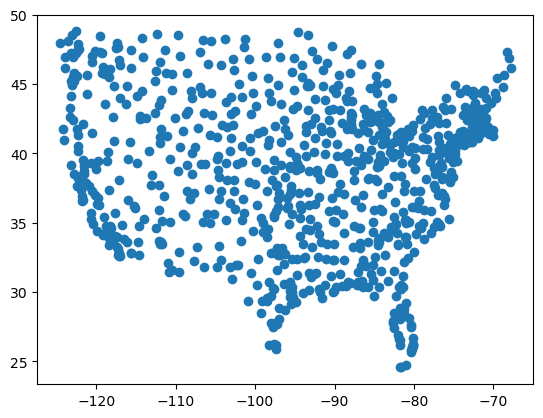

In [22]:
plt.scatter(stations_lls['lon'], stations_lls['lat'])

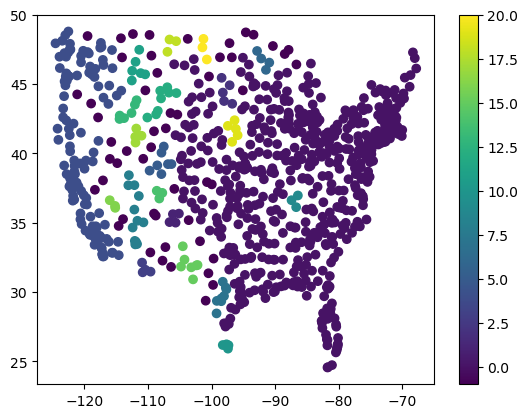

In [55]:
my_clustering = clustering.DBSCAN(eps=0.02, min_samples=3, metric='haversine').fit(np.radians(stations_lls))
sca_colors = plt.scatter(stations_lls['lon'], stations_lls['lat'], c=my_clustering.labels_)
plt.colorbar()

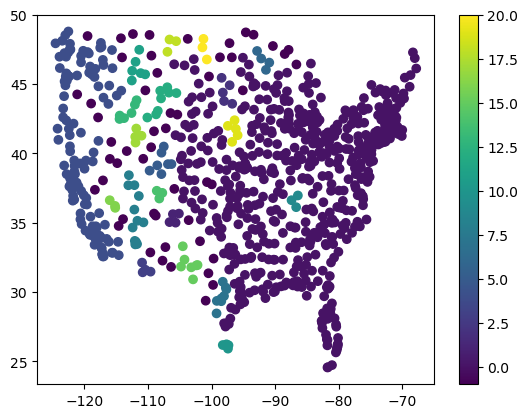

In [54]:
my_clustering = clustering.DBSCAN(eps=0.02, min_samples=3, metric='haversine', p=3).fit(np.radians(stations_lls))
sca_colors = plt.scatter(stations_lls['lon'], stations_lls['lat'], c=my_clustering.labels_)
plt.colorbar()

## OPTICS

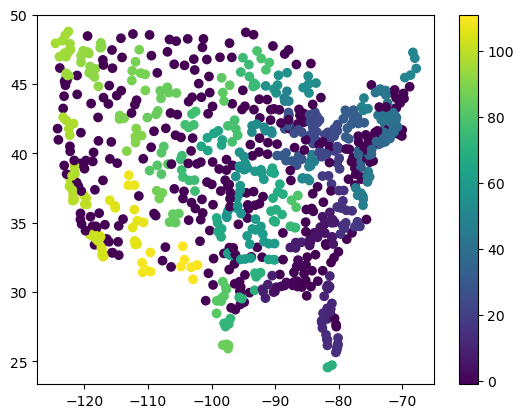

In [56]:
my_clustering = clustering.OPTICS(min_samples=3, metric='haversine').fit(np.radians(stations_lls))
sca_colors = plt.scatter(stations_lls['lon'], stations_lls['lat'], c=my_clustering.labels_)
plt.colorbar()